In [1]:

import csv
import pickle
import os
import glob
import json

import numpy as np
import pandas as pd

from datetime import datetime, timedelta, date

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
file_names = glob.glob('results/*/short_results.csv')
file_names

['results/en_dense/short_results.csv',
 'results/en_svm/short_results.csv',
 'results/pl_lstm/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/en_lstm/short_results.csv',
 'results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv']

In [3]:
order = [6, 3, 0, 2, 1, 4, 5]
file_names = [file_names[i] for i in order]
file_names

['results/pl_dense/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/en_dense/short_results.csv',
 'results/pl_lstm/short_results.csv',
 'results/en_svm/short_results.csv',
 'results/en_lstm/short_results.csv',
 'results/pl_svm/short_results.csv']

In [4]:
summary_data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    summary_data.append({'acc': np.mean(df['Accuracy']),
                         'f1s0': np.mean(df['F1 score (0)']),
                         'f1s1': np.mean(df['F1 score (1)'])})
summary_df = pd.DataFrame(summary_data)
summary_df

,acc,f1s0,f1s1
0,0.931301,0.960522,0.735201
1,0.883555,0.840139,0.908425
2,0.917896,0.882911,0.936784
3,0.981814,0.989327,0.938575
4,0.913059,0.871722,0.934248
5,0.897158,0.857311,0.919609
6,0.925747,0.955175,0.783831


In [5]:
labels = ['SVM', 'Dense NN', 'Conv. NN', 'LSTM NN']

In [6]:
def models_comparison_bars(df, labels, title, save_file=None):
    
    def set_bar_labels(axis, bars):
        for bar in bars:
            h = bar.get_height()
            w = bar.get_width()
            x_c = bar.get_x()
            axis.annotate('{}'.format(round(h, 2)), xy=(x_c + w/2, h), xytext=(0, -20),
                          textcoords='offset points', size=15, ha='center', va='bottom')
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    
    x = range(len(labels))
    acc = df['acc'].values
    f1s0 = df['f1s0'].values
    f1s1 = df['f1s1'].values
    
    max_acc_id = np.argmax(acc)
    max_f1s0_id = np.argmax(f1s0)
    max_f1s1_id = np.argmax(f1s1)
    
    bars0 = axs[0].bar(x, acc, color='r')
    axs[0].set_xlabel('Model')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Accuracy')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].set_ylim([0, 1])
    set_bar_labels(axs[0], bars0)
    axs[0].patches[max_acc_id].set_facecolor('g')
    
    bars1 = axs[1].bar(x, f1s0, color='b')
    axs[1].set_xlabel('Model')
    axs[1].set_ylabel('F1 score (no hate)')
    axs[1].set_title('F1 score (no hate)')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].set_ylim([0, 1])
    set_bar_labels(axs[1], bars1)
    axs[1].patches[max_f1s0_id].set_facecolor('g')
    
    bars2 = axs[2].bar(x, f1s1, color='m')
    axs[2].set_xlabel('Model')
    axs[2].set_ylabel('F1 score (hate speech)')
    axs[2].set_title('F1 score (hate speech)')
    axs[2].set_xticks(x)
    axs[2].set_xticklabels(labels)
    axs[2].set_ylim([0, 1])
    set_bar_labels(axs[2], bars2)
    axs[2].patches[max_f1s1_id].set_facecolor('g')
    
    fig.suptitle(title)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

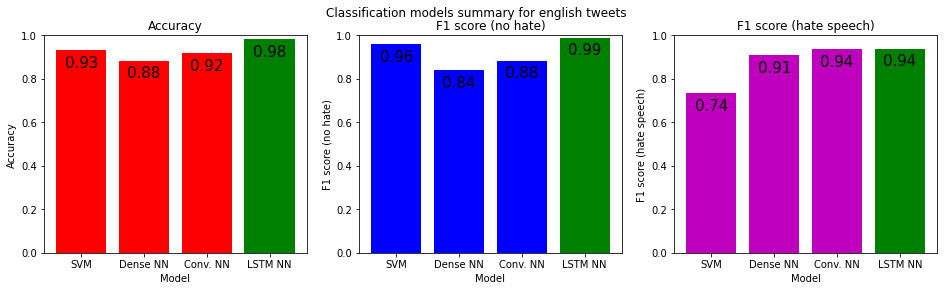

In [7]:
models_comparison_bars(summary_df.iloc[0:4], labels=labels,
                       title='Classification models summary for english tweets',
                       save_file='results/summary_en.png')